# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

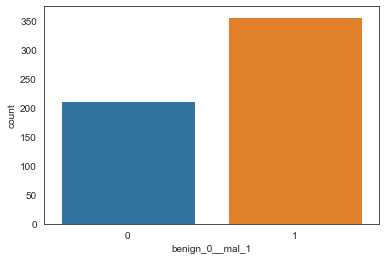

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

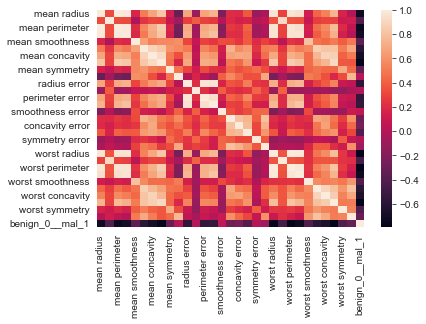

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

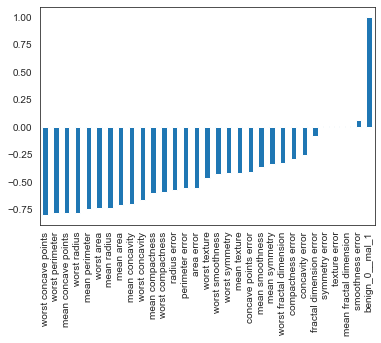

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

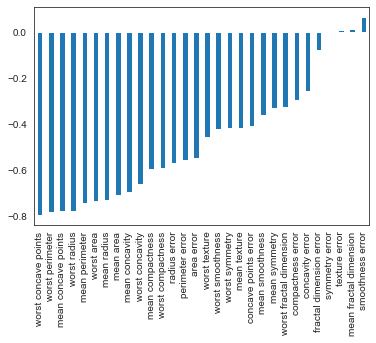

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [20]:
X_train.shape

(426, 30)

In [21]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [22]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6283 - val_loss: 0.5967
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5742 - val_loss: 0.5458
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5243 - val_loss: 0.4947
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4764 - val_loss: 0.4490
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4328 - val_loss: 0.4053
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3927 - val_loss: 0.3653
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3565 - val_loss: 0.3291
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3242 - val_loss: 0.2966
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2982 - val_loss: 0.2698
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2739 - val_loss: 0.2482
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.1154
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.1185
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.1212
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.1156
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.1176
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.1163
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.1176
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.1149
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0556 - val_loss: 0.1275
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.1160
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.1368
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0412 - val_loss: 0.1308
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.1378
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.1346
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0421 - val_loss: 0.1448
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0415 - val_loss: 0.1372
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.1332
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.1437
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.1340
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0461 - val_loss: 0.1384
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 0.1492
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.1496
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1301
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.1674
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0343 - val_loss: 0.1373
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.1514
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.1351
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0304 - val_loss: 0.1552
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.1455
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.1593
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.1503
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.1576
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.1614
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.1536
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.1627
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.1491
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.1746
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0272 - val_loss: 0.1475
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.1824
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.1507
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.1892
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.1743
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.1998
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.1776
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.1782
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.1902
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.1782
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.1847
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.1926
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.2002
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.2292
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.2297
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.2482
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.2322
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.2367
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.2401
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.2461
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.2341
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.2452
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.2435
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.3083
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.3131
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.3258
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.3067
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.3249
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.3329
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.3090
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.3146
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.3119
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.3382
Epoc

In [23]:
model.history.history

{'loss': [0.6283250451087952,
  0.5741875171661377,
  0.524299144744873,
  0.4763656258583069,
  0.4327995181083679,
  0.3927060663700104,
  0.35651713609695435,
  0.3242259919643402,
  0.29819855093955994,
  0.273853063583374,
  0.25345152616500854,
  0.2369775027036667,
  0.22426703572273254,
  0.21085847914218903,
  0.19755172729492188,
  0.18701888620853424,
  0.17854444682598114,
  0.17266890406608582,
  0.16457338631153107,
  0.15839320421218872,
  0.14707869291305542,
  0.1427309662103653,
  0.1357976645231247,
  0.13067202270030975,
  0.12527090311050415,
  0.12102454900741577,
  0.1159292683005333,
  0.114115409553051,
  0.11391067504882812,
  0.10737400501966476,
  0.10034889727830887,
  0.10043063014745712,
  0.09743808954954147,
  0.09267257153987885,
  0.09054809808731079,
  0.08922364562749863,
  0.08675560355186462,
  0.08464521914720535,
  0.08258842676877975,
  0.08066094666719437,
  0.07995395362377167,
  0.07885187119245529,
  0.07651182264089584,
  0.075205653905868

In [24]:
model_loss = pd.DataFrame(model.history.history)

In [25]:
model_loss

,loss,val_loss
0,0.628325,0.596680
1,0.574188,0.545839
2,0.524299,0.494742
3,0.476366,0.448952
4,0.432800,0.405272
...,...,...
595,0.005460,0.354227
596,0.005487,0.355749
597,0.006627,0.340640
598,0.008147,0.373670


<AxesSubplot:>

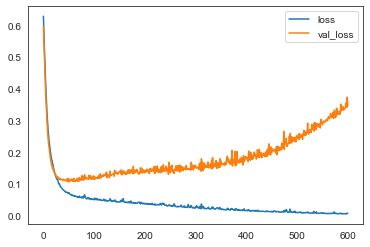

In [26]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [46]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [49]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [50]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6891 - val_loss: 0.6782
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 0.6611
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6488 - val_loss: 0.6416
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6263 - val_loss: 0.6171
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6002 - val_loss: 0.5887
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5687 - val_loss: 0.5549
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5328 - val_loss: 0.5147
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4858 - val_loss: 0.4562
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4307 - val_loss: 0.4014
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3851 - val_loss: 0.3555
Epoch 11/

<AxesSubplot:>

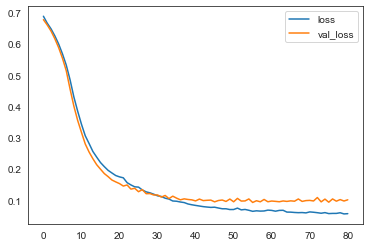

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
help(Dropout)

Help on class Dropout in module keras.layers.core.dropout:

class Dropout(keras.engine.base_layer.BaseRandomLayer)
 |  Dropout(rate, noise_shape=None, seed=None, **kwargs)
 |  
 |  Applies Dropout to the input.
 |  
 |  The Dropout layer randomly sets input units to 0 with a frequency of `rate`
 |  at each step during training time, which helps prevent overfitting.
 |  Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
 |  all inputs is unchanged.
 |  
 |  Note that the Dropout layer only applies when `training` is set to True
 |  such that no values are dropped during inference. When using `model.fit`,
 |  `training` will be appropriately set to True automatically, and in other
 |  contexts, you can set the kwarg explicitly to True when calling the layer.
 |  
 |  (This is in contrast to setting `trainable=False` for a Dropout layer.
 |  `trainable` does not affect the layer's behavior, as Dropout does
 |  not have any variables/weights that can be frozen during 

In [54]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7229 - val_loss: 0.6894
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6831 - val_loss: 0.6721
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6803 - val_loss: 0.6578
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6593 - val_loss: 0.6436
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6383 - val_loss: 0.6220
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6244 - val_loss: 0.6021
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6069 - val_loss: 0.5870
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5837 - val_loss: 0.5629
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5754 - val_loss: 0.5249
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5448 - val_loss: 0.4892
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1207 - val_loss: 0.0955
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1022 - val_loss: 0.0887
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0956 - val_loss: 0.0825
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1149 - val_loss: 0.0867
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0978 - val_loss: 0.0888
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1122 - val_loss: 0.0951
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0969 - val_loss: 0.1008
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1131 - val_loss: 0.0807
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1114 - val_loss: 0.0945
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.0994
Epoch 93/600


<AxesSubplot:>

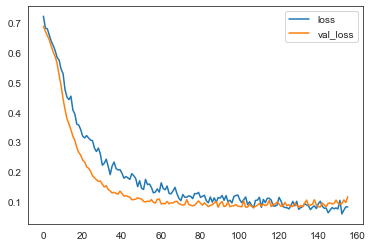

In [56]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [64]:
predictions = model.predict(X_test)

In [65]:
predictions

array([[9.94212806e-01],
       [9.86022830e-01],
       [9.96451795e-01],
       [3.97229195e-03],
       [9.99595940e-01],
       [9.99817610e-01],
       [9.99729931e-01],
       [1.80557450e-07],
       [9.98340964e-01],
       [9.98359680e-01],
       [3.47912312e-04],
       [9.94536817e-01],
       [9.04713154e-01],
       [9.99502003e-01],
       [2.02596188e-04],
       [9.98920202e-01],
       [9.96129811e-01],
       [9.99574959e-01],
       [1.68503357e-06],
       [4.69611585e-02],
       [9.58807707e-01],
       [9.97897267e-01],
       [9.87447262e-01],
       [9.99604702e-01],
       [1.18839741e-03],
       [9.30203557e-01],
       [1.20411416e-04],
       [9.99991298e-01],
       [1.21911100e-04],
       [1.77752972e-03],
       [9.93224084e-02],
       [4.75555658e-04],
       [5.63483596e-01],
       [9.76471603e-02],
       [9.99822497e-01],
       [9.99838471e-01],
       [1.08426213e-02],
       [2.92296708e-02],
       [7.41904005e-05],
       [1.69336056e-06],


In [69]:
def assign_class(x):
    if x>= 0.5:
        return 1
    else:
        return 0

In [73]:
predictions = pd.DataFrame(predictions)[0].apply(assign_class).values

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [76]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
